# Linear Regression and Polynomial Regression

#### *advertising.csv* dataset

In [1]:
#This homework assignment will build three models on the advertising data and evaluate their performance. 
# You can use tools from sklearn to complete this task.

In [2]:
# Source of data: https://www.statlearning.com/s/Advertising.csv

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
advertising = pd.read_csv("Advertising.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


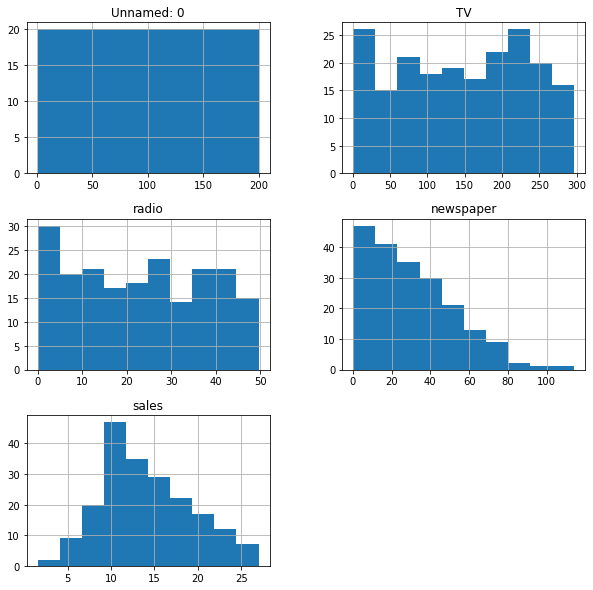

In [5]:
fig = advertising.hist(figsize=(10, 10))

In [6]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


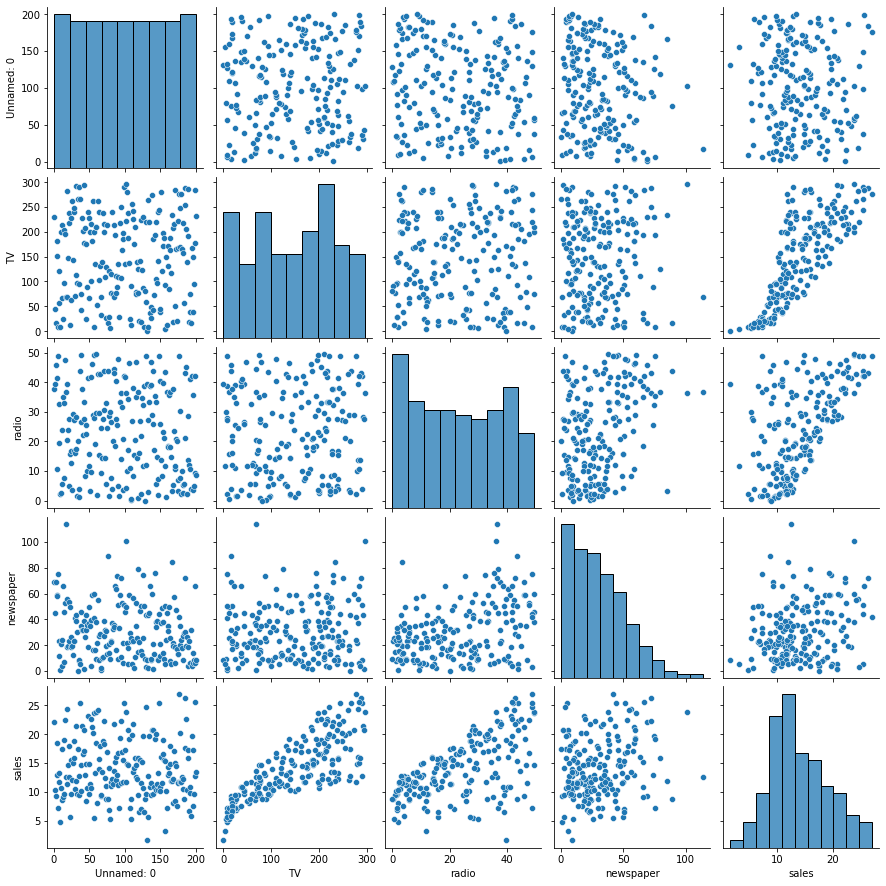

In [7]:
sns.pairplot(advertising)

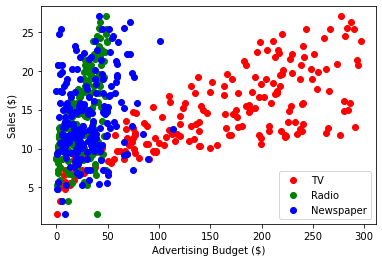

In [8]:
# Create a scatter plot of TV, radio, and newspaper against sales
plt.scatter(advertising["TV"], advertising["sales"], color="red", label="TV")
plt.scatter(advertising["radio"], advertising["sales"], color="green", label="Radio")
plt.scatter(advertising["newspaper"], advertising["sales"], color="blue", label="Newspaper")

# Add axis labels and legend
plt.xlabel("Advertising Budget ($)")
plt.ylabel("Sales ($)")
plt.legend()

# Show the plot
plt.show()

In [9]:
# 1. Use train_test_split to split the data into training set (80%) and test set (20%).

In [10]:
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(advertising, test_size=0.2)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

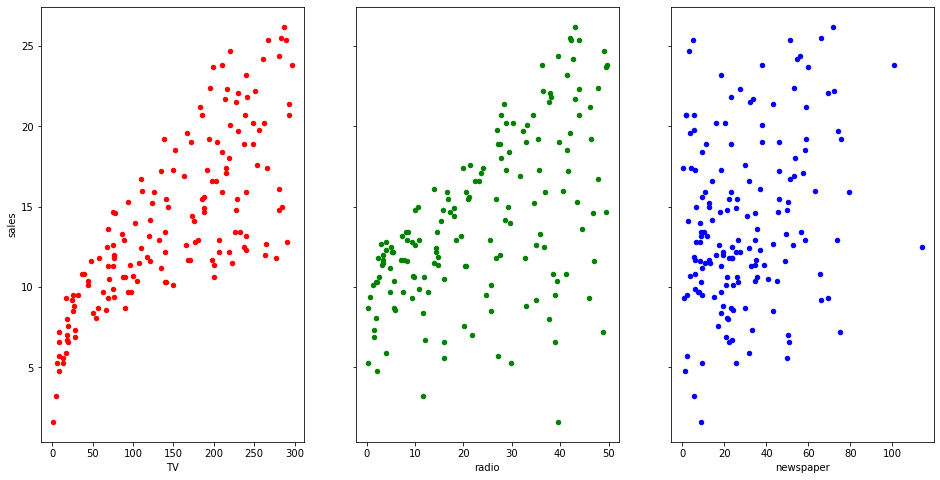

In [11]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
training_data.plot(kind="scatter",x='TV',y='sales', color= 'r',ax=axs[0],figsize=(16,8))
training_data.plot(kind="scatter",x='radio',y='sales', color= 'g',ax=axs[1],figsize=(16,8))
training_data.plot(kind="scatter",x='newspaper',y='sales', color= 'b', ax=axs[2],figsize=(16,8))

In [12]:
# 2. Build a multilinear regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output variable.
#    Name the model model_lr. Train the model on the training set and obtain model predictions on the test set.

In [13]:
from sklearn.linear_model import LinearRegression

input_cols = ["TV", "radio", "newspaper"]

model_lr = LinearRegression()

model_lr.fit(training_data[input_cols], training_data[["sales"]]) 

LinearRegression()

In [14]:
print("Theta 0:", model_lr.intercept_)
print("Theta 1 and Theta 2:", model_lr.coef_)

Theta 0: [2.78204842]
Theta 1 and Theta 2: [[0.04575   0.1867837 0.0041678]]


In [15]:
# Apply the model to provide prediction for Fred
test_data['prediction'] = model_lr.predict(test_data[input_cols])
test_data.head()

<ipython-input-15-e7ad3988c0ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_lr.predict(test_data[input_cols])


,Unnamed: 0,TV,radio,newspaper,sales,prediction
34,35,95.7,1.4,7.4,9.5,7.452662
52,53,216.4,41.7,39.6,22.6,20.636273
45,46,175.1,22.5,31.5,14.9,15.126792
158,159,11.7,36.9,45.2,7.3,10.398027
185,186,205.0,45.1,19.6,22.6,20.666431


In [16]:
# 3. Build a degree 2 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr2. Train the model on the training set and obtain model predictions on the test set.

In [17]:
# use .to_numpy() function in order to plot pandas data

In [18]:
training_data

,Unnamed: 0,TV,radio,newspaper,sales
116,117,139.2,14.3,25.6,12.2
139,140,184.9,43.9,1.7,20.7
150,151,280.7,13.9,37.0,16.1
5,6,8.7,48.9,75.0,7.2
61,62,261.3,42.7,54.7,24.2
...,...,...,...,...,...
159,160,131.7,18.4,34.6,12.9
47,48,239.9,41.5,18.5,23.2
58,59,210.8,49.6,37.7,23.8
124,125,229.5,32.3,74.2,19.7


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [20]:
poly_features1 = PolynomialFeatures(degree=2, include_bias=False)
poly_features1.fit(training_data[input_cols])
X_poly = poly_features1.transform(training_data[input_cols])
model_pr2 = LinearRegression()
model_pr2.fit(X_poly, training_data[["sales"]])
print(model_pr2.coef_, model_pr2.intercept_)

[[ 5.29524431e-02  2.74606444e-02  1.08905121e-02 -1.12126318e-04
   1.10490467e-03 -5.36439566e-05 -3.73408241e-05  1.16229759e-04
  -1.82565875e-05]] [4.86593976]


In [21]:
test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
test_data.head()

<ipython-input-21-9a3ef5a268e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))


,Unnamed: 0,TV,radio,newspaper,sales,prediction
34,35,95.7,1.4,7.4,9.5,9.135792
52,53,216.4,41.7,39.6,22.6,22.259663
45,46,175.1,22.5,31.5,14.9,15.763560
158,159,11.7,36.9,45.2,7.3,7.530049
185,186,205.0,45.1,19.6,22.6,22.480643


In [22]:
# 4. Build a degree 10 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr10. Train the model on the training set and obtain model predictions on the test set.

In [23]:
poly_features2 = PolynomialFeatures(degree=10, include_bias=False)
poly_features2.fit(training_data[input_cols])
X_poly = poly_features2.fit_transform(training_data[input_cols])
model_pr10 = LinearRegression()
model_pr10.fit(X_poly, training_data[["sales"]])
print(model_pr10.coef_, model_pr10.intercept_)

[[ 2.24901940e-11 -6.14040910e-13 -1.12412198e-12  7.38940958e-13
   5.29039447e-13  3.39673423e-13  1.55768794e-14 -5.02060438e-14
   8.26613008e-14 -2.52494108e-14  5.55520854e-15 -9.19085917e-14
  -1.10568351e-13 -2.13831196e-14  1.21510484e-15 -1.00177848e-14
  -1.69525985e-14  1.07393613e-14  1.12664349e-14  8.92719610e-13
   1.33094399e-13  2.74951602e-13  1.52316631e-14  4.79282166e-14
   7.94763307e-14 -5.99809917e-16  5.23767616e-15  1.32904855e-14
   2.19315278e-14 -1.39409218e-15 -2.01524725e-15 -1.00812973e-15
   2.26817498e-15  4.71504503e-15  2.55374138e-11  5.15074486e-12
   1.06153703e-11  5.48219697e-13  2.02973846e-12  3.37907810e-12
   7.57041423e-14  3.00531819e-13  6.48457315e-13  9.77946684e-13
   1.61881519e-14  2.61364421e-14  7.08599462e-14  1.70437376e-13
   2.47076679e-13 -1.03009576e-14 -2.91879770e-14 -2.41527395e-14
  -8.51343280e-15  2.67245792e-14  5.00515164e-14  3.79066998e-11
   1.08681366e-10  2.37974715e-10  1.08482838e-11  5.22706385e-11
   9.21233

In [24]:
print(model_pr10.coef_, model_pr10.intercept_)

[[ 2.24901940e-11 -6.14040910e-13 -1.12412198e-12  7.38940958e-13
   5.29039447e-13  3.39673423e-13  1.55768794e-14 -5.02060438e-14
   8.26613008e-14 -2.52494108e-14  5.55520854e-15 -9.19085917e-14
  -1.10568351e-13 -2.13831196e-14  1.21510484e-15 -1.00177848e-14
  -1.69525985e-14  1.07393613e-14  1.12664349e-14  8.92719610e-13
   1.33094399e-13  2.74951602e-13  1.52316631e-14  4.79282166e-14
   7.94763307e-14 -5.99809917e-16  5.23767616e-15  1.32904855e-14
   2.19315278e-14 -1.39409218e-15 -2.01524725e-15 -1.00812973e-15
   2.26817498e-15  4.71504503e-15  2.55374138e-11  5.15074486e-12
   1.06153703e-11  5.48219697e-13  2.02973846e-12  3.37907810e-12
   7.57041423e-14  3.00531819e-13  6.48457315e-13  9.77946684e-13
   1.61881519e-14  2.61364421e-14  7.08599462e-14  1.70437376e-13
   2.47076679e-13 -1.03009576e-14 -2.91879770e-14 -2.41527395e-14
  -8.51343280e-15  2.67245792e-14  5.00515164e-14  3.79066998e-11
   1.08681366e-10  2.37974715e-10  1.08482838e-11  5.22706385e-11
   9.21233

In [25]:
test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
test_data.head()

<ipython-input-25-72c594bb49bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))


,Unnamed: 0,TV,radio,newspaper,sales,prediction
34,35,95.7,1.4,7.4,9.5,9.516165
52,53,216.4,41.7,39.6,22.6,186.789129
45,46,175.1,22.5,31.5,14.9,26.886024
158,159,11.7,36.9,45.2,7.3,-308.947172
185,186,205.0,45.1,19.6,22.6,113.275810


In [26]:
# 5. Calculate the test MSE of each model using the mean_squared_error function. Which model gives the best MSE?

In [27]:
predictions_pr2 = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
MSE_pr2 = mean_squared_error(test_data[["sales"]], predictions_pr2)
print("MSE for degree-2 polynomial regression:", MSE_pr2)

MSE for degree-2 polynomial regression: 0.28777193576891535


In [28]:
predictions_pr10 = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
mse = mean_squared_error(test_data[["sales"]], predictions_pr10)
print("MSE for degree-10 polynomial regression:", mse)

MSE for degree-10 polynomial regression: 4196053316.867234


In [29]:
print("model_pr2 has the best MSE ", MSE_pr2)

model_pr2 has the best MSE  0.28777193576891535
